In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
BATCH_SIZE = 256
NUM_CLASES = 10
EPOCHS = 200
NUM_NETS = 1       # Solo una red para hacer pruebas
VERBOSE = 2

In [3]:
# Carga de los datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Guardamos x_test original para imprimir figuras
xx_test = x_test

# Guardamos la codificacion de clases explicitas inicial, nos hará falta
yy_test = y_test

x_train = np.reshape(x_train, (50000, 32, 32, 3))		  ## para CNN
x_test = np.reshape(x_test, (10000, 32, 32, 3))		    ## para CNN

# Normalizamos los valores de píxeles del rango 0-255 a 0.0-1.0
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Para problemas Multiclase conviene usar One Hot Encoding (y categorical_crossentropy+softmax)
# Cada valor de clase (0-9) se convierte en un vector de 0s y un 1
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASES)


In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Creamos el conjunto de modelos a entrenar
model = [0] * NUM_NETS

for j in range(NUM_NETS):
    model[j] = Sequential()
    # model[j].add(Conv2D(320, (2, 2), padding='same', input_shape=(32, 32, 3)))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Conv2D(320, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Conv2D(320, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Conv2D(640, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.1))
    # model[j].add(Conv2D(640, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.1))
    # model[j].add(Conv2D(640, (2, 2), strides=2, padding='same'))
    # model[j].add(Conv2D(960, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.2))
    # model[j].add(Conv2D(960, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.2))
    # model[j].add(Conv2D(960, (2, 2), strides=2, padding='same'))
    # model[j].add(Conv2D(1280, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.3))
    # model[j].add(Conv2D(1280, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.3))
    # model[j].add(Conv2D(1280, (2, 2), strides=2, padding='same'))
    # model[j].add(Conv2D(1600, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.4))
    # model[j].add(Conv2D(1600, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.4))
    # model[j].add(Conv2D(1600, (2, 2), strides=2, padding='same'))
    # model[j].add(Conv2D(1920, (2, 2), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.5))
    # model[j].add(Conv2D(1920, (1, 1), padding='same'))
    # model[j].add(LeakyReLU(alpha=0.05))
    # model[j].add(Dropout(0.5))
    # model[j].add(Flatten())
    # model[j].add(Dense(NUM_CLASES, activation='softmax'))

    model[j].add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same', input_shape=(32, 32, 3)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(0.2))
    model[j].add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(0.3))
    model[j].add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(0.4))
    model[j].add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(0.5))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)))
    model[j].add(Dropout(0.5))
    model[j].add(Dense(NUM_CLASES, activation='softmax'))

    model[j].summary()
    model[j].compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [6]:
# (OPTIONAL) create data generator
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
datagen.fit(x_train)

history = [0] * NUM_NETS

for j in range(NUM_NETS):
        print('NET ', j+1)
        history[j] = model[j].fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE), steps_per_epoch=len(x_train)//BATCH_SIZE,
                                  epochs=EPOCHS, verbose=2, validation_data=(x_test,y_test))
        # history[j] = model[j].fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, validation_data=(x_test,y_test))
        score = model[j].evaluate(x_test, y_test, verbose = VERBOSE)
        print('Test accuracy:', score[1])

NET  1
Epoch 1/100
196/196 - 5s - loss: 2.5649 - accuracy: 0.1351 - val_loss: 2.3168 - val_accuracy: 0.2013
Epoch 2/100
196/196 - 4s - loss: 1.9926 - accuracy: 0.3154 - val_loss: 1.8345 - val_accuracy: 0.4024
Epoch 3/100
196/196 - 4s - loss: 1.7215 - accuracy: 0.4397 - val_loss: 1.6152 - val_accuracy: 0.4862
Epoch 4/100
196/196 - 4s - loss: 1.5234 - accuracy: 0.5297 - val_loss: 1.3574 - val_accuracy: 0.5883
Epoch 5/100
196/196 - 4s - loss: 1.3852 - accuracy: 0.5833 - val_loss: 1.2657 - val_accuracy: 0.6160
Epoch 6/100
196/196 - 4s - loss: 1.2866 - accuracy: 0.6175 - val_loss: 1.2314 - val_accuracy: 0.6331
Epoch 7/100
196/196 - 4s - loss: 1.2058 - accuracy: 0.6507 - val_loss: 1.1172 - val_accuracy: 0.6754
Epoch 8/100
196/196 - 4s - loss: 1.1337 - accuracy: 0.6761 - val_loss: 1.0646 - val_accuracy: 0.6972
Epoch 9/100
196/196 - 4s - loss: 1.0722 - accuracy: 0.6978 - val_loss: 0.9990 - val_accuracy: 0.7228
Epoch 10/100
196/196 - 4s - loss: 1.0193 - accuracy: 0.7143 - val_loss: 0.9575 - val

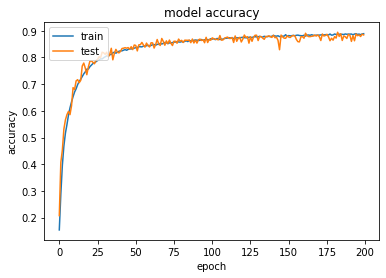

In [8]:
import matplotlib.pyplot as plt

plt.plot(history[0].history['accuracy'])
plt.plot(history[0].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## HAY un ERROR EN LA RED ANTERIOR ?
## En este caso no llega a haber ninguna capa de tamaño impar,
## con lo que el MaxPooling no tendrá problema

## Red 845Kparámetros

In [6]:
# Alternativa más segura. con strides=2
model = [0] * NUM_NETS

for j in range(NUM_NETS):
    model[j] = Sequential()
    model[j].add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same', input_shape=(32, 32, 3)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, (3, 3), activation='relu', strides=2, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.2))
    model[j].add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Conv2D(64, (3, 3), activation='relu', strides=2, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Dropout(0.3))
    model[j].add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Conv2D(128, (3, 3), activation='relu', strides=2, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Dropout(0.4))
    model[j].add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Conv2D(256, (3, 3), activation='relu', strides=2, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001), padding='same'))
    model[j].add(Dropout(0.5))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)))
    model[j].add(Dropout(0.5))
    model[j].add(Dense(NUM_CLASES, activation='softmax'))

    model[j].summary()
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [ ]:
## Los parametros en este caso son de nuevo 845K parámetros, los mismos
## La duda es si aprenderá mejor.

In [15]:
history = [0] * NUM_NETS

for j in range(NUM_NETS):
        print('NET ', j+1)
        history[j] = model[j].fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = 1, verbose = 1)
        score = model[j].evaluate(x_test, y_test, verbose = VERBOSE)
        print('Test accuracy:', score[1])

NET  1
196/196 [==============================] - 2s 8ms/step - loss: 1.7275 - accuracy: 0.3662

In [7]:
history = [0] * NUM_NETS

for j in range(NUM_NETS):
        print('NET ', j+1)
        history[j] = model[j].fit(x_train, y_train, batch_size = BATCH_SIZE,
                                  epochs = EPOCHS, verbose = 2, validation_data=(x_test,y_test))
        score = model[j].evaluate(x_test, y_test, verbose = VERBOSE)
        print('Test accuracy:', score[1])

NET  1
Epoch 1/100
196/196 - 4s - loss: 2.2494 - accuracy: 0.2275 - val_loss: 2.0820 - val_accuracy: 0.3131
Epoch 2/100
196/196 - 3s - loss: 1.7961 - accuracy: 0.4114 - val_loss: 1.7974 - val_accuracy: 0.4109
Epoch 3/100
196/196 - 3s - loss: 1.6171 - accuracy: 0.4770 - val_loss: 1.4704 - val_accuracy: 0.5350
Epoch 4/100
196/196 - 3s - loss: 1.4970 - accuracy: 0.5247 - val_loss: 1.4168 - val_accuracy: 0.5586
Epoch 5/100
196/196 - 4s - loss: 1.3966 - accuracy: 0.5642 - val_loss: 1.3120 - val_accuracy: 0.5903
Epoch 6/100
196/196 - 4s - loss: 1.3221 - accuracy: 0.5917 - val_loss: 1.2184 - val_accuracy: 0.6231
Epoch 7/100
196/196 - 4s - loss: 1.2452 - accuracy: 0.6223 - val_loss: 1.1562 - val_accuracy: 0.6533
Epoch 8/100
196/196 - 4s - loss: 1.1973 - accuracy: 0.6396 - val_loss: 1.1563 - val_accuracy: 0.6535
Epoch 9/100
196/196 - 4s - loss: 1.1449 - accuracy: 0.6617 - val_loss: 1.1467 - val_accuracy: 0.6574
Epoch 10/100
196/196 - 4s - loss: 1.1073 - accuracy: 0.6794 - val_loss: 1.1089 - val

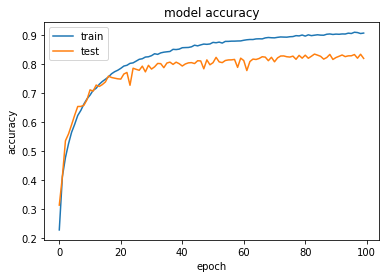

In [8]:
import matplotlib.pyplot as plt

plt.plot(history[0].history['accuracy'])
plt.plot(history[0].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
resultados = np.zeros((y_test.shape[0], NUM_CLASES))

for j in range(NUM_NETS):
        y_pred = model[j].predict(x_test)
        resultados = resultados + y_pred
# Reconvertimos la codificacion One Shot a una etiqueta de clase (0-9)
        y_pred = np.argmax (y_pred, axis=1)
        print ('Accuracy NET ', j, accuracy_score(yy_test, y_pred))

Accuracy NET  0 0.861
Accuracy NET  1 0.8441
Accuracy NET  2 0.8407
Accuracy NET  3 0.8235
Accuracy NET  4 0.8409
Accuracy NET  5 0.8373
Accuracy NET  6 0.8424
Accuracy NET  7 0.8473
Accuracy NET  8 0.8208
Accuracy NET  9 0.8268
Accuracy NET  10 0.8435
Accuracy NET  11 0.8332
Accuracy NET  12 0.8289
Accuracy NET  13 0.8347
Accuracy NET  14 0.8378
Accuracy NET  15 0.8386
Accuracy NET  16 0.8483
Accuracy NET  17 0.8463
Accuracy NET  18 0.8496
Accuracy NET  19 0.8458


In [8]:
# La suma de salidas la reconvertimos de One Shot Encoding a la etiqueta de clase correspondiente (0-9)
resultados = np.argmax(resultados, axis=1)
print ('Accuracy Ensemble ', accuracy_score(yy_test, resultados))

Accuracy Ensemble  0.8897


In [9]:
model[0].evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7294 - accuracy: 0.8621

[0.7294270396232605, 0.8621000051498413]

In [21]:
CLASSES = np.array(['airplane', 'automobile', 'bird',
    'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model[0].predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

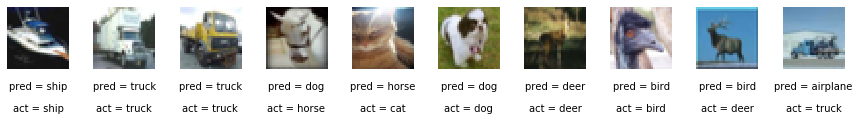

In [22]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
